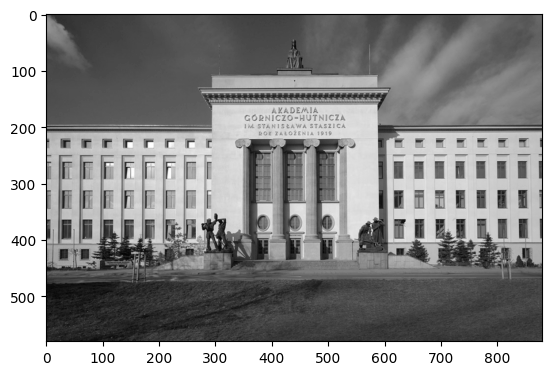

In [3]:
import cv2
from matplotlib import pyplot

# a) Proszę wczytać przykładowy obraz i skonwertować go do skali szarości.
image_bgr = cv2.imread("res/lab3_1.jpg")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
pyplot.imshow(image, 'gray')

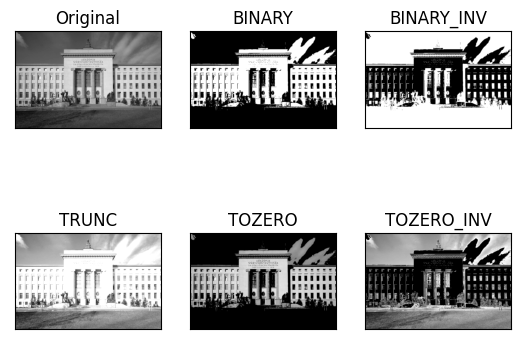

In [9]:
# b) Proszę sprawdzić i porównać wynik progowania ze statycznym ustalonym globalnie
#    progiem zrealizowanego z użyciem każdego z dostępnych w OpenCV trybu progowania
#    (cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC,
#    cv2.THRESH_TOZERO i cv2.THRESH_TOZERO_INV)
threshold: int = 127
max: int = 255
types : list[int] = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV,
]
titles : list[str] = [
    "BINARY",
    "BINARY_INV",
    "TRUNC",
    "TOZERO",
    "TOZERO_INV"
]
blobs = zip(types, titles)

pyplot.subplot(2, 3, 1)
pyplot.imshow(image, 'gray')
pyplot.title("Original")
pyplot.xticks([])
pyplot.yticks([])
for i, blob in enumerate(blobs):
    type, title = blob
    ret, thresh = cv2.threshold(
        src=image,
        thresh=threshold,
        maxval=max,
        type=type,
    )
    pyplot.subplot(2, 3, i+2)
    pyplot.imshow(thresh, 'gray')
    pyplot.title(title)
    pyplot.xticks([])
    pyplot.yticks([])
pyplot.show()

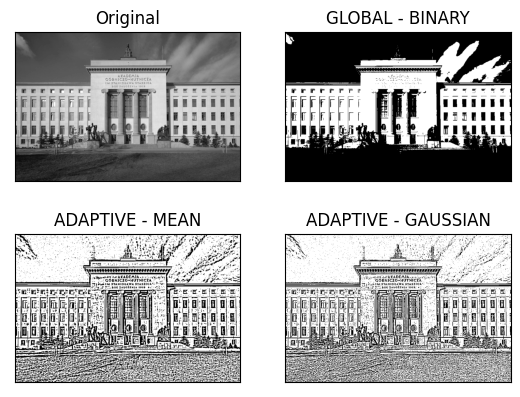

In [11]:
# c) Proszę zastosować metody adaptacyjnego doboru progu. Jaki wpływ na wynik ma rozmiar
#    sąsiedztwa? Która z metod daje lepsze rezultaty
types: list[int] = [
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
]
titles: list[str] = [
    "ADAPTIVE - MEAN",
    "ADAPTIVE - GAUSSIAN",
]
blobs = zip(types, titles)

pyplot.subplot(2, 2, 1)
pyplot.imshow(image, "gray")
pyplot.title("Original")
pyplot.xticks([])
pyplot.yticks([])

ret, thresh_binary = cv2.threshold(src=image, thresh=threshold, maxval=max, type=cv2.THRESH_BINARY)
pyplot.subplot(2, 2, 2)
pyplot.imshow(thresh_binary, 'gray')
pyplot.title("GLOBAL - BINARY")
pyplot.xticks([])
pyplot.yticks([])
for i, blob in enumerate(blobs):
    type, title = blob
    thresh = cv2.adaptiveThreshold(
        src=image,
        maxValue=max,
        adaptiveMethod=type,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=11,
        C=2,
    )
    pyplot.subplot(2, 2, i + 3)
    pyplot.imshow(thresh, "gray")
    pyplot.title(title)
    pyplot.xticks([])
    pyplot.yticks([])
pyplot.show()

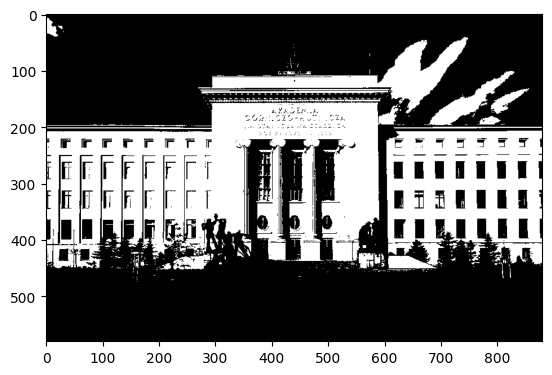

In [15]:
# d) Proszę zastosować metodę Otsu, wykreślić histogram obrazu i zlokalizować na nim
#    uzyskaną wartość progu.
thresh_value, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
pyplot.imshow(thresh_otsu, 'gray')

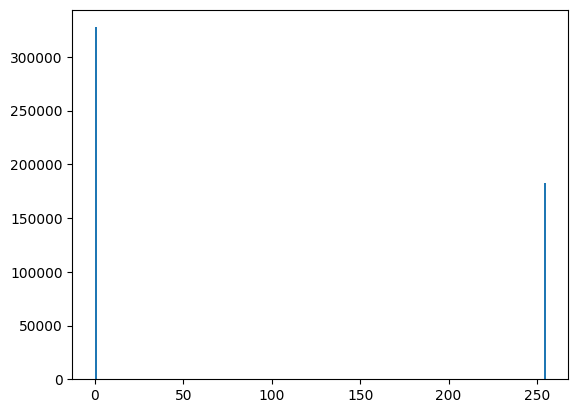

thresh_value=133.0


In [16]:
pyplot.hist(thresh_otsu.ravel(), 256)
pyplot.show()
print(f"{thresh_value=}")

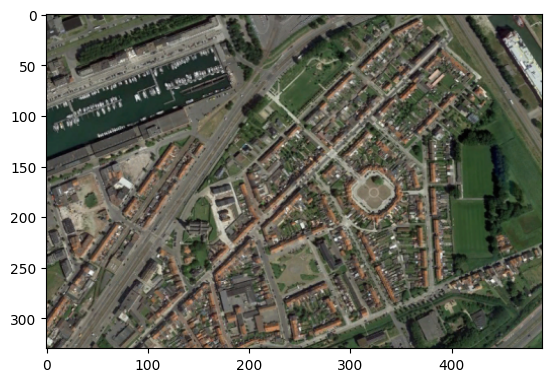

In [17]:
# e) Proszę wczytać drugi z obrazów i dokonać jego segmentacji z użyciem algorytmu k-
#    średnich na 2, 4, 8 klastrów. Proszę zweryfikować wizualnie wynik klasteryzacji (kolor
#    każdego piksela to kolor środka klastra do którego go przypisaliśmy) i sprawdzić czy
#    kolory odpowiadają jakimś cechom zdjęcia które analizuj
image2_bgr = cv2.imread("res/lab3_2.png")
image2 = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2RGB)
pyplot.imshow(image2)

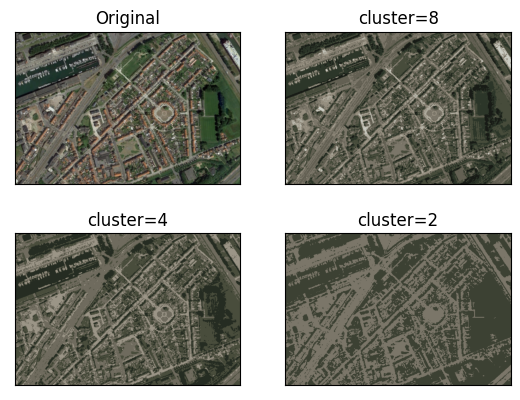

In [26]:
import numpy as np

dims = image2.reshape((-1, 3))
dims = np.float32(dims)
criteria = [cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0]
clusters = [8, 4, 2]

pyplot.subplot(2, 2, 1)
pyplot.imshow(image2)
pyplot.title("Original")
pyplot.xticks([])
pyplot.yticks([])
for i, cluster in enumerate(clusters):
    _, label, center = cv2.kmeans(dims, cluster, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((image2.shape))
    pyplot.subplot(2, 2, i + 2)
    pyplot.imshow(res)
    pyplot.title(f"{cluster=}")
    pyplot.xticks([])
    pyplot.yticks([])

In [33]:
# f) Proszę samodzielnie zaimplementować metodę Otsu. Czy otrzymany próg różni się od
#    bibliotecznej implementacji? Jeśli tak to dlaczego?
def otsu(image, is_normalized=False):
    
    # Set total number of bins in the histogram
    bins_num = 256
    
    # Get the image histogram
    hist, bin_edges = np.histogram(image, bins=bins_num)
    
    # Get normalized histogram if it is required
    if is_normalized:
        hist = np.divide(hist.ravel(), hist.max())
    
    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    
    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    
    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
    
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    
    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)
    
    threshold = bin_mids[:-1][index_of_max_val]
    print(f"Otsu's algorithm implementation thresholding result: {threshold}")

image2_gray = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2GRAY)
otsu(image2_gray)
thresh_value, _ = cv2.threshold(image2_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(f"Otsu's cv2 built-in implementation thresholding result: {thresh_value}")

Otsu's algorithm implementation thresholding result: 89.998046875
Otsu's cv2 built-in implementation thresholding result: 90.0
